In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Load the dataset

In [2]:
X = np.loadtxt('gatlin.csv', delimiter=',')
print('X is of shape {}'.format(X.shape))
print(X)

X is of shape (480, 640)
[[30. 31. 29. ... 55. 54. 56.]
 [30. 30. 29. ... 53. 53. 53.]
 [30. 30. 28. ... 52. 52. 52.]
 ...
 [13. 13. 13. ... 26. 25. 26.]
 [15. 15. 15. ... 28. 28. 28.]
 [17. 18. 18. ... 27. 28. 27.]]


## TODO: Perform SVD on the X matrix
Instructions: Perform SVD decomposition of matrix X. 
## Save the three factors in variables U, S and V

In [3]:
U,S,V = np.linalg.svd(X)

In [4]:
U.shape

(480, 480)

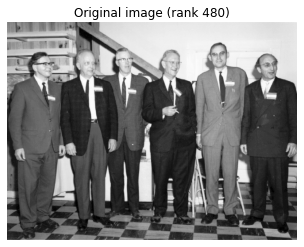

In [5]:
# Plot the original image
plt.figure(1)
plt.imshow(X, cmap=cm.Greys_r)
plt.title('Original image (rank 480)')
plt.axis('off')
plt.draw()

Matrix reconstruction using the top k = [10, 20, 50, 100, 200] singular values

## TODO: Create four matrices X10, X20, X50, X100, X200 for each low rank approximation

In [6]:
np.diag(S)

array([[1.54624402e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.08537020e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.53867053e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.72719675e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.60731378e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.39816320e+00]])

In [7]:
create_matrix = lambda U,S,V,x: np.dot(np.dot(U[:,:x],np.diag(S)[:x,:x]),V[:x,:])
X10 = create_matrix(U,S,V,10)
X20 = create_matrix(U,S,V,20)
X50 = create_matrix(U,S,V,50)
X100 = create_matrix(U,S,V,100)
X200 = create_matrix(U,S,V,200)

X10

array([[29.34074778, 28.9011703 , 28.50475277, ..., 50.2719344 ,
        50.07664714, 49.51194297],
       [28.83018652, 28.4019461 , 28.00268222, ..., 49.46669059,
        49.25728075, 48.66041407],
       [28.76364755, 28.31247034, 27.91523784, ..., 49.22600583,
        48.96448993, 48.34492694],
       ...,
       [21.45215065, 21.24702196, 21.06517163, ..., 27.95850446,
        29.83928266, 31.06130306],
       [24.33730336, 24.22816403, 24.08718878, ..., 28.8311328 ,
        31.26762979, 33.01001955],
       [26.95293563, 26.77286032, 26.60583079, ..., 29.94463873,
        32.52367774, 34.50338577]])

Error of approximation
## TODO: Compute and print the error of each low rank approximation of the matrix
The Frobenius error can be computed as $\frac{||X - X_k||}{||X||}$


In [8]:
calculate_error = lambda Y: np.linalg.norm(X-Y)/np.linalg.norm(X)

In [9]:
print(calculate_error(X10))
print(calculate_error(X20))
print(calculate_error(X50))
print(calculate_error(X100))
print(calculate_error(X200))

0.19091376028241397
0.13235525168247878
0.06498381006503925
0.03265209761334089
0.013628869122994587


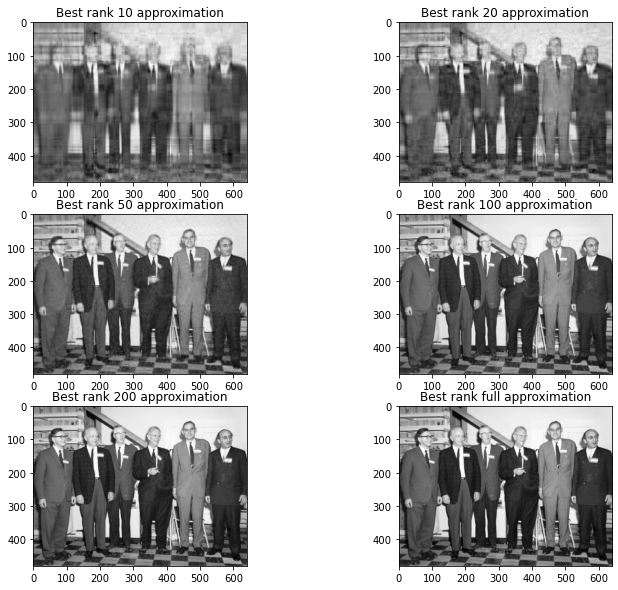

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
Xs = [X10, X20, X50, X100, X200, X]
ranks = ['10', '20', '50', '100', '200', 'full']
axs = axs.ravel()

for i in range(len(Xs)):
    axs[i].imshow(Xs[i], cmap=cm.Greys_r)
    axs[i].set_title('Best rank ' + ranks[i] + ' approximation')

Plot the singular values of the original matrix
## TODO: Plot the singular values of X versus their rank k

Text(0.5, 1.0, 'Singular values in function of k')

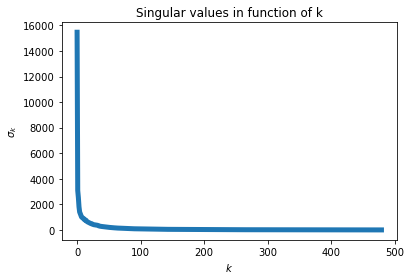

In [12]:
plt.figure(3)
plt.plot(S, linewidth = 5)
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma_k$')
plt.title('Singular values in function of k')